In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

In [2]:
#Loading the dataset

df_link = "https://raw.githubusercontent.com/PacktPublishing/Machine-Learning-in-Biotechnology-and-Life-Sciences/refs/heads/main/datasets/dataset_wisc_sd.csv"

In [3]:
df = pd.read_csv(df_link)
df.head().T

,0,1,2,3,4
id,842302,842517,84300903,84348301,84358402
diagnosis,M,M,M,M,M
radius_mean,17.99,20.57,19.69,11.42,20.29
texture_mean,10.38,17.77,21.25,20.38,14.34
perimeter_mean,122.8,132.9,130.0,77.58,135.1
area_mean,1001.0,1326.0,1203.0,386.1,1297.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043


In [4]:
#rows and columns
df.shape

(569, 32)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
#total number of null values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  2
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  3
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       1
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           1
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#fill NaN values using the mean

df['area_mean']= df['area_mean'].fillna(df['area_mean'].mean())
df['radius_se']= df['radius_se'].fillna(df['radius_se'].mean())
df['smoothness_worst']= df['smoothness_worst'].fillna(df['smoothness_worst'].mean())
df['fractal_dimension_se']= df['fractal_dimension_se'].fillna(df['fractal_dimension_se'].mean())

df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
#number of patients with malignant cancerous cells
malignant = df[df['diagnosis'] == 'M'].shape
malignant

(212, 32)

In [9]:
#number of patients with benign cancerous cells

benign = df[df['diagnosis'] == "B"].shape
benign

(357, 32)

In [10]:
#change object dtype into float
df['concave points_worst'] = df['concave points_worst'].str.replace('\\n\\n','').astype(float)

In [11]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
#splitting our data into features (X) and target (y)

X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

In [13]:
#Normalizing our data
from sklearn.preprocessing import StandardScaler

#initialize the scaler 
scaler = StandardScaler()

#fit and transform
scaled_data = scaler.fit_transform(X)

### Elbow Method
#### Using the Elbow Method to determine the optimal number of clusters (K) in KMeans Clustering

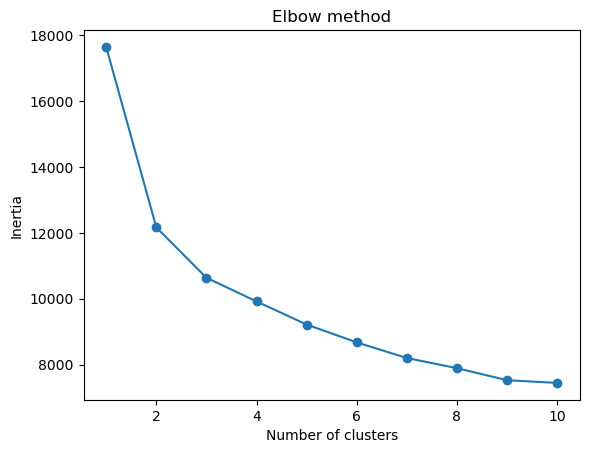

In [14]:
from sklearn.cluster import KMeans

# Initialize empty list to store inertia values
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### KMeans Clustering

In [15]:
from sklearn.cluster import KMeans

#Initialize KMeans
KMeans = KMeans (n_clusters = 2, random_state = 42)

#fit the model

KMeans.fit(scaled_data)

#add the clusters to the original dataframe
df['Cluster'] = KMeans.labels_

df['Cluster']

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: Cluster, Length: 569, dtype: int32

### Principal Component Analysis

In [16]:
from sklearn.decomposition import PCA

#reduce dimensions to 2D for better visualization
pca = PCA(n_components = 2)

principal_component = pca.fit_transform(scaled_data)

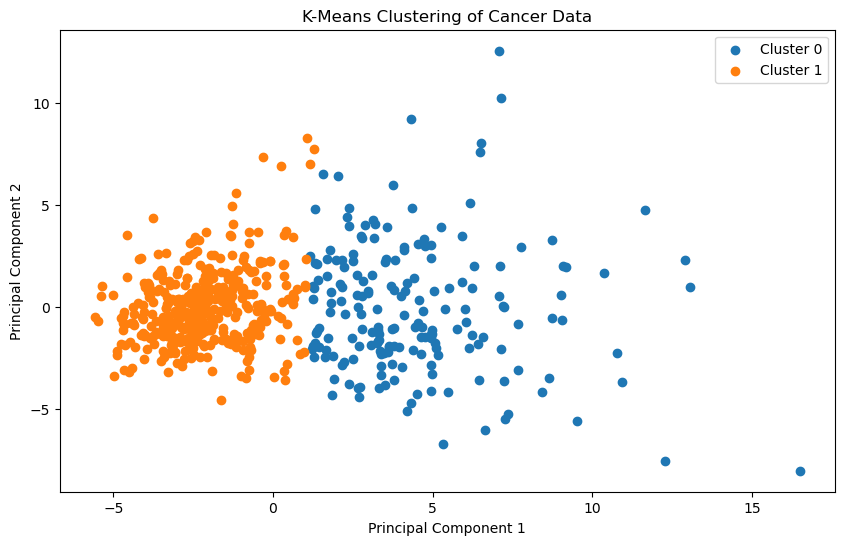

In [17]:
#create a new df with PCA

pc_df = pd.DataFrame(data = principal_component, columns = ['PC1', 'PC2'])
pc_df['Cluster'] = df['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in pc_df['Cluster'].unique():
    cluster_data = pc_df[pc_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')
plt.title('K-Means Clustering of Cancer Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

## The malignant(M) cancerous cell is Cluster 0 and the benign(B) cancerous cell is Cluster 1